## Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import multiprocessing as mp
from multiprocessing import Process

%matplotlib inline

In [2]:
iphone = pd.read_csv("/Users/peterhoang/Downloads/iphone_smallmatrix_labeled_8d.csv")
samsung = pd.read_csv("/Users/peterhoang/Downloads/galaxy_smallmatrix_labeled_8d.csv")

- iOS – counts mentions of iOS on a webpage
- iphonecampos – counts positive sentiment mentions of the iphone camera
- galaxydisneg – counts negative sentiment mentions of the Galaxy display
- htcperunc – counts the unclear sentiment mentions of HTC performance

### Explore the Data

In [16]:
iphone.tail()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
12968,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
12969,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12970,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
12971,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
12972,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [15]:
samsung.tail()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
12968,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
12969,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12970,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
12971,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
12972,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [17]:
iphone.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
count,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,...,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000
mean,2.148077,0.071148,0.024050,0.002312,0.137131,0.152316,0.039621,0.289601,0.053727,0.009944,...,0.002312,0.005550,0.064133,0.059200,0.038542,0.057581,0.058198,0.033069,0.016110,3.724505
std,5.664226,0.280869,0.171266,0.051144,4.223547,0.839081,0.255020,2.188978,0.711322,0.163251,...,0.086887,0.183249,0.829639,0.550736,0.426599,0.565341,0.586035,0.313733,0.285808,1.851348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


In [18]:
samsung.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
count,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,...,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000
mean,2.148077,0.071148,0.024050,0.002312,0.137131,0.152316,0.039621,0.289601,0.053727,0.009944,...,0.002312,0.005550,0.064133,0.059200,0.038542,0.057581,0.058198,0.033069,0.016110,3.824327
std,5.664226,0.280869,0.171266,0.051144,4.223547,0.839081,0.255020,2.188978,0.711322,0.163251,...,0.086887,0.183249,0.829639,0.550736,0.426599,0.565341,0.586035,0.313733,0.285808,1.781302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


In [19]:
iphone.info() #type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12973 entries, 0 to 12972
Data columns (total 59 columns):
iphone             12973 non-null int64
samsunggalaxy      12973 non-null int64
sonyxperia         12973 non-null int64
nokialumina        12973 non-null int64
htcphone           12973 non-null int64
ios                12973 non-null int64
googleandroid      12973 non-null int64
iphonecampos       12973 non-null int64
samsungcampos      12973 non-null int64
sonycampos         12973 non-null int64
nokiacampos        12973 non-null int64
htccampos          12973 non-null int64
iphonecamneg       12973 non-null int64
samsungcamneg      12973 non-null int64
sonycamneg         12973 non-null int64
nokiacamneg        12973 non-null int64
htccamneg          12973 non-null int64
iphonecamunc       12973 non-null int64
samsungcamunc      12973 non-null int64
sonycamunc         12973 non-null int64
nokiacamunc        12973 non-null int64
htccamunc          12973 non-null int64
iphonedispo

In [20]:
samsung.info()#type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12973 entries, 0 to 12972
Data columns (total 59 columns):
iphone             12973 non-null int64
samsunggalaxy      12973 non-null int64
sonyxperia         12973 non-null int64
nokialumina        12973 non-null int64
htcphone           12973 non-null int64
ios                12973 non-null int64
googleandroid      12973 non-null int64
iphonecampos       12973 non-null int64
samsungcampos      12973 non-null int64
sonycampos         12973 non-null int64
nokiacampos        12973 non-null int64
htccampos          12973 non-null int64
iphonecamneg       12973 non-null int64
samsungcamneg      12973 non-null int64
sonycamneg         12973 non-null int64
nokiacamneg        12973 non-null int64
htccamneg          12973 non-null int64
iphonecamunc       12973 non-null int64
samsungcamunc      12973 non-null int64
sonycamunc         12973 non-null int64
nokiacamunc        12973 non-null int64
htccamunc          12973 non-null int64
iphonedispo

In [23]:
iphone.isna().sum().sum() #No NAs in iphone DF

0

In [24]:
samsung.isna().sum().sum() #No NAs samsung DF

0

#### Correlation Matrix (iphone)

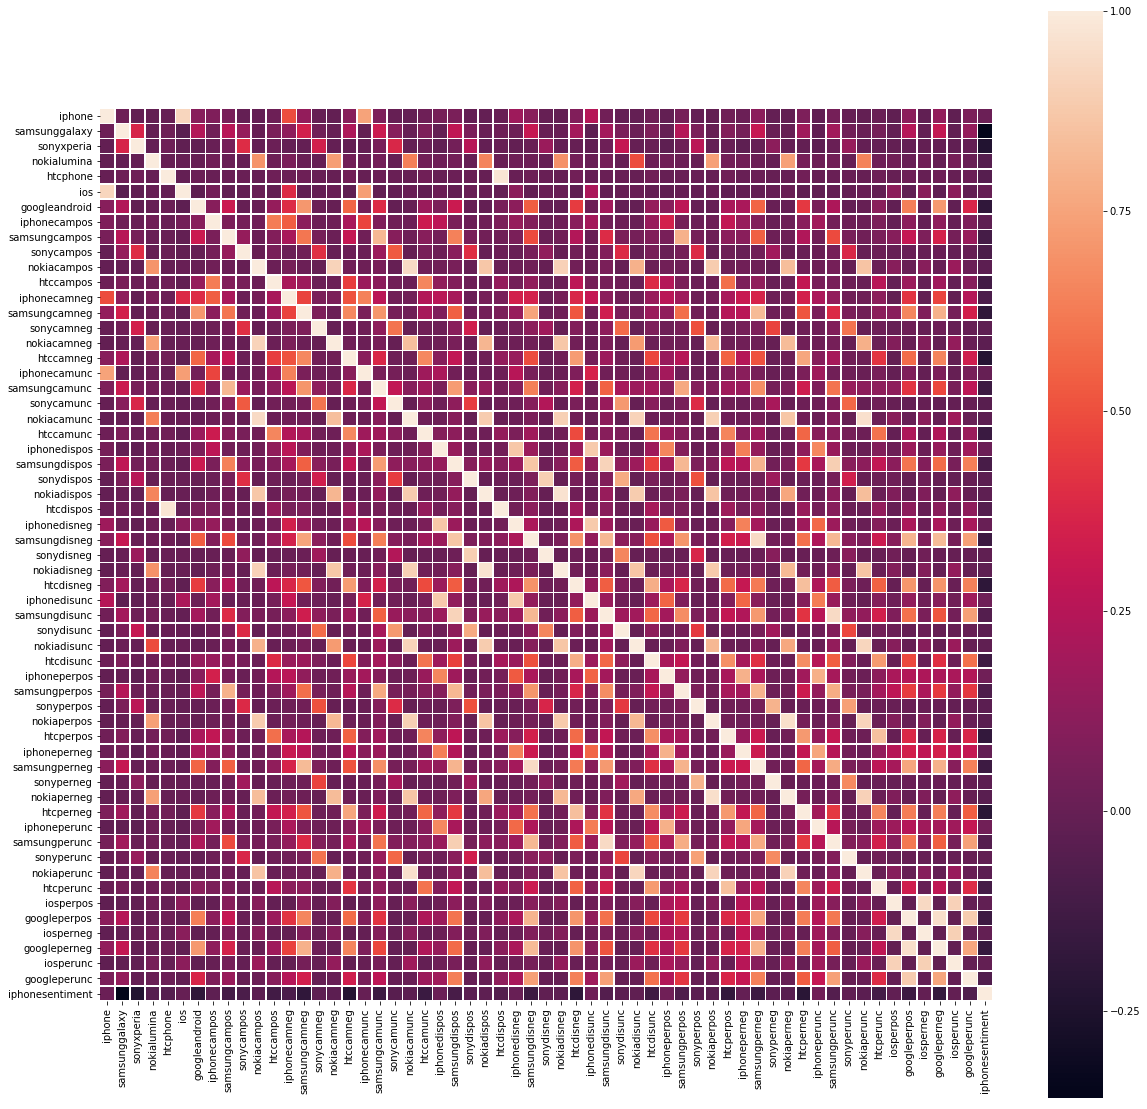

In [6]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(iphone.corr(), annot=False,linewidths=.5, square=True,ax=ax)


In [7]:
len(iphone.columns) #Number of columns

59

In [72]:
iphone_corr = iphone[iphone.columns[0:59]].corr()['iphonesentiment'][:-1]
iphone_corr.sort_values(ascending=False)
#Dependent variable: iphonesentiment
#Descending order 

iphoneperunc     0.037200
iphoneperpos     0.029638
iphonedisunc     0.027173
iphone           0.014859
iphonedispos     0.014547
iphonedisneg     0.003145
ios              0.001656
iphonecamunc     0.001443
iphoneperneg    -0.004804
iosperneg       -0.010179
iosperunc       -0.011787
iosperpos       -0.015758
sonyperunc      -0.018084
sonydisneg      -0.019956
nokiadisunc     -0.023972
sonycamneg      -0.024826
nokiadispos     -0.025922
nokiadisneg     -0.028759
iphonecampos    -0.029731
sonyperneg      -0.030850
nokiacamunc     -0.031550
sonydisunc      -0.032137
nokiacamneg     -0.033069
nokiacampos     -0.033375
nokiaperunc     -0.036167
sonydispos      -0.038635
sonyperpos      -0.038913
nokiaperpos     -0.041595
nokiaperneg     -0.044219
sonycamunc      -0.050327
htcphone        -0.051285
nokialumina     -0.055962
samsungperunc   -0.057920
samsungdisunc   -0.059548
htcdispos       -0.060406
googleperunc    -0.070284
samsungperpos   -0.081063
iphonecamneg    -0.083963
sonycampos  

In [70]:
iphone.corr() # Actual Values 
              # In heatmap putting all values make it unvisible 

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
iphone,1.000000,0.019786,-0.011618,-0.013423,-0.002731,0.922060,0.107530,0.078157,0.057395,-0.004594,...,-0.003045,-0.009704,0.011414,-0.020059,0.118008,-0.019081,0.138742,-0.020368,0.067859,0.014859
samsunggalaxy,0.019786,1.000000,0.366671,-0.006088,0.017899,-0.044678,0.236162,0.030556,0.252121,0.145969,...,0.037482,0.007305,0.044928,-0.005802,0.246046,-0.007839,0.290975,-0.015329,0.142252,-0.359173
sonyxperia,-0.011618,0.366671,1.000000,-0.006350,0.023682,-0.023884,-0.018288,0.005068,0.050140,0.396751,...,0.151675,-0.004253,-0.004888,-0.011009,-0.008467,-0.010323,-0.008570,-0.014802,-0.007916,-0.233170
nokialumina,-0.013423,-0.006088,-0.006350,1.000000,0.000673,-0.002819,-0.001115,0.029824,0.009299,-0.002754,...,-0.001204,0.648441,0.023757,0.030719,0.006515,0.032721,0.000653,0.052887,0.007999,-0.055962
htcphone,-0.002731,0.017899,0.023682,0.000673,1.000000,-0.005002,0.016498,0.006952,0.010865,0.010432,...,0.005018,0.000112,0.021448,-0.002927,0.019186,-0.002758,0.020726,-0.002666,0.013305,-0.051285
ios,0.922060,-0.044678,-0.023884,-0.002819,-0.005002,1.000000,-0.026404,0.042128,-0.010741,-0.009369,...,-0.004832,0.005030,-0.011930,0.118278,-0.016402,0.112330,-0.018028,0.117035,-0.010233,0.001656
googleandroid,0.107530,0.236162,-0.018288,-0.001115,0.016498,-0.026404,1.000000,0.104420,0.315487,-0.000206,...,-0.004135,-0.001407,0.109685,-0.016702,0.638581,-0.015825,0.716515,-0.016377,0.371998,-0.189142
iphonecampos,0.078157,0.030556,0.005068,0.029824,0.006952,0.042128,0.104420,1.000000,0.062438,0.045009,...,0.019987,0.014827,0.067283,-0.003991,0.117902,-0.007060,0.124355,-0.001037,0.073004,-0.029731
samsungcampos,0.057395,0.252121,0.050140,0.009299,0.010865,-0.010741,0.315487,0.062438,1.000000,0.145429,...,0.057860,0.033197,0.061304,0.102471,0.298281,0.075695,0.357362,0.044890,0.159171,-0.112743
sonycampos,-0.004594,0.145969,0.396751,-0.002754,0.010432,-0.009369,-0.000206,0.045009,0.145429,1.000000,...,0.378812,-0.001845,0.015781,-0.003118,0.006673,-0.002863,0.008455,-0.006421,-0.003434,-0.090665


In [73]:
def get_redundant_pairs(iphone):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = iphone.columns
    for i in range(0, iphone.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(iphone, n=5):
    au_corr = iphone.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(iphone)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print()
print(get_top_abs_correlations(iphone, 30)) #we can change the number of the top pairs 

Top Absolute Correlations

htcphone       htcdispos        0.977538
nokiadispos    nokiadisneg      0.964213
nokiacamunc    nokiaperunc      0.958152
googleperpos   googleperneg     0.957410
nokiaperpos    nokiaperneg      0.957014
samsungdisunc  samsungperunc    0.940304
nokiacampos    nokiacamunc      0.940221
samsungdisneg  samsungperneg    0.939467
iosperpos      iosperneg        0.932382
nokiadisunc    nokiaperunc      0.923934
iphone         ios              0.922060
nokiaperpos    nokiaperunc      0.917333
nokiacampos    nokiacamneg      0.914272
nokiacamunc    nokiadisunc      0.912114
samsungdispos  samsungdisunc    0.909832
nokiacampos    nokiadisneg      0.905733
nokiaperneg    nokiaperunc      0.905222
iosperpos      iosperunc        0.905079
nokiacamunc    nokiadisneg      0.904113
               nokiaperpos      0.902765
iosperneg      iosperunc        0.899819
samsungdispos  samsungperunc    0.898381
sonydispos     sonydisneg       0.897287
nokiacampos    nokiaperpos    

### Examine Feature Variance 

In [19]:
#from sklearn.feature_selection import VarianceThreshold
#variance = VarianceThreshold(threshold=(.2 * (1 - .2)))    
#variance.fit_transform(iphone)

In [22]:
var = iphone.var()
var.sort_values(ascending=True)

nokialumina         0.002616
sonycamunc          0.005848
sonycamneg          0.007241
sonyperunc          0.007549
nokiacamunc         0.016407
sonydisunc          0.022104
sonycampos          0.026651
sonyxperia          0.029332
nokiaperunc         0.033580
nokiacamneg         0.037581
samsungcamunc       0.040121
sonyperpos          0.041399
nokiadisunc         0.045921
nokiacampos         0.051834
googleandroid       0.065035
nokiadisneg         0.076178
samsunggalaxy       0.078888
googleperunc        0.081686
sonyperneg          0.093160
nokiaperneg         0.093867
iosperunc           0.098428
nokiaperpos         0.105191
sonydispos          0.113962
nokiadispos         0.137043
samsungperunc       0.159162
googleperpos        0.181987
htccamunc           0.233751
samsungdisunc       0.238240
samsungcamneg       0.281155
iosperpos           0.303310
iosperneg           0.319610
googleperneg        0.343437
htcdisunc           0.424081
htccamneg           0.484882
samsungperneg 

### Recursive Feature Elimination 

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = iphone.drop(["iphonesentiment"], axis = 1)
y = iphone["iphonesentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [51]:
# Define dictionary to store our rankings
ranks = {}

# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [37]:
colnames = iphone.columns

In [42]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 fe

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
rfc = RandomForestRegressor(n_estimators=200)


In [18]:
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
estimator = rfc

In [25]:
selector = RFE(estimator, 5, step=1)


In [26]:
selector = selector.fit(X, y)
#selector.support_ 

### Modelling 

### Train and Split

In [4]:
from sklearn.model_selection import train_test_split 

X = iphone.drop(["iphonesentiment"], axis = 1)
y = iphone["iphonesentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))
print("Accuracy:",accuracy_score(y_test, knn_pred))


[[ 398    0    0    5    1  248]
 [   2    0    0    0    1  142]
 [   2    0   18    2    2  127]
 [   4    0    0  244    1  139]
 [   8    0    0    7  145  297]
 [  13    0    2   18   26 2430]]


              precision    recall  f1-score   support

           0       0.93      0.61      0.74       652
           1       0.00      0.00      0.00       145
           2       0.90      0.12      0.21       151
           3       0.88      0.63      0.73       388
           4       0.82      0.32      0.46       457
           5       0.72      0.98      0.83      2489

   micro avg       0.76      0.76      0.76      4282
   macro avg       0.71      0.44      0.49      4282
weighted avg       0.76      0.76      0.72      4282

Accuracy: 0.7554880896777207


/Users/peterhoang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/peterhoang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/peterhoang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

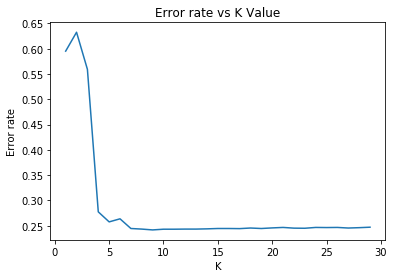

In [15]:
plt.figure()
plt.plot(range(1,30), error_rate)
plt.title("Error rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error rate")

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtree_pred))
print('\n')
print(classification_report(y_test, dtree_pred))
print("Accuracy:",accuracy_score(y_test, dtree_pred))

[[ 406    4    7    3   15  217]
 [   1    2    0    0    0  142]
 [   4    1   19    2    2  123]
 [   3    2    2  243    4  134]
 [  13    1    1    4  153  285]
 [  39   21   20   15   52 2342]]


              precision    recall  f1-score   support

           0       0.87      0.62      0.73       652
           1       0.06      0.01      0.02       145
           2       0.39      0.13      0.19       151
           3       0.91      0.63      0.74       388
           4       0.68      0.33      0.45       457
           5       0.72      0.94      0.82      2489

   micro avg       0.74      0.74      0.74      4282
   macro avg       0.61      0.44      0.49      4282
weighted avg       0.72      0.74      0.71      4282

Accuracy: 0.739140588510042


### Random Forests

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))
print("Accuracy:",accuracy_score(y_test, rfc_pred))

[[ 410    0    0    2    3  237]
 [   2    0    0    0    0  143]
 [   4    0   18    1    1  127]
 [   2    0    0  247    0  139]
 [   7    1    0    3  155  291]
 [  14    5    2    9   23 2436]]


              precision    recall  f1-score   support

           0       0.93      0.63      0.75       652
           1       0.00      0.00      0.00       145
           2       0.90      0.12      0.21       151
           3       0.94      0.64      0.76       388
           4       0.85      0.34      0.49       457
           5       0.72      0.98      0.83      2489

   micro avg       0.76      0.76      0.76      4282
   macro avg       0.73      0.45      0.51      4282
weighted avg       0.77      0.76      0.73      4282

Accuracy: 0.7627276973376926


In [28]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [29]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [43]:
rfc_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

### SVM

In [24]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print(confusion_matrix(y_test, svm_pred))
print('\n')
print(classification_report(y_test, svm_pred))
print("Accuracy:",accuracy_score(y_test, svm_pred))

/Users/peterhoang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 411    0    0    4    1  236]
 [   3    0    0    0    0  142]
 [  18    0    1    1    2  129]
 [   6    0    0  140    0  242]
 [  13    0    0    4  135  305]
 [  16    0    0   23    7 2443]]


              precision    recall  f1-score   support

           0       0.88      0.63      0.73       652
           1       0.00      0.00      0.00       145
           2       1.00      0.01      0.01       151
           3       0.81      0.36      0.50       388
           4       0.93      0.30      0.45       457
           5       0.70      0.98      0.82      2489

   micro avg       0.73      0.73      0.73      4282
   macro avg       0.72      0.38      0.42      4282
weighted avg       0.75      0.73      0.68      4282

Accuracy: 0.7309668379262028


/Users/peterhoang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/peterhoang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/peterhoang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Neural Network

In [25]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier()

MLP.fit(X_train, y_train)

MPL_pred = MLP.predict(X_test)

print(confusion_matrix(y_test, MPL_pred))
print('\n')
print(classification_report(y_test, MPL_pred))
print("Accuracy:",accuracy_score(y_test, MPL_pred))

[[ 407    0    2    2    2  239]
 [   0    0    0    0    0  145]
 [   0    0   18    1    1  131]
 [   2    0    0  244    0  142]
 [   6    1    1    3  147  299]
 [   9    2    3   16   16 2443]]


              precision    recall  f1-score   support

           0       0.96      0.62      0.76       652
           1       0.00      0.00      0.00       145
           2       0.75      0.12      0.21       151
           3       0.92      0.63      0.75       388
           4       0.89      0.32      0.47       457
           5       0.72      0.98      0.83      2489

   micro avg       0.76      0.76      0.76      4282
   macro avg       0.71      0.45      0.50      4282
weighted avg       0.77      0.76      0.72      4282

Accuracy: 0.7610929472209248


/Users/peterhoang/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Parallel processes 

In [ ]:
def factorial1(n):
    
    num = 1 
    
    while n >= 1:
        num* = n 
        n = n -1
        
    out_file = open("out1.txt", "w")
    out_file.writelines(str(num))
    out_file.close()
    
def factorial2(n):
    
    num = 1 
    
    while n >= 1:
        num* = n 
        n = n -1
        
    out_file = open("out2.txt", "w")
    out_file.writelines(str(num))
    out_file.close()

def Main():
    
    N = int(input("Enter the integer: "))
    
    p1 = Process(target=factorial1,args=(N,))
    p2 = Process(target=factorial2,args=(N,))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
if __name__ == '__main__':
    Main()

In [3]:
mp.cpu_count() #Number of Core I can use 

4